In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.stats.multitest as smsm
import statsmodels.api as sm

In [4]:
data = pd.read_csv('NSTEVENS.csv')
data.head(10)

,Prev.Length,Match.Score,Tile.Size,Prev.Type
0,50,25,0.1,TT
1,100,25,0.1,TT
2,50,75,0.1,TT
3,100,75,0.1,TT
4,50,25,0.5,TT
5,100,25,0.5,TT
6,50,75,0.5,TT
7,100,75,0.5,TT
8,50,25,0.1,AC
9,100,25,0.1,AC


PreviewLength: Low (-1) = 50, High (+1) = 100

MatchScore: Low (-1) = 25, High (+1) = 75

TileSize: Low (-1) = .1, High (+1) = .5

PreviewType: Low (-1) = TT, High (+1) = AC

In [5]:
data = pd.read_csv('results/RESULTS_NSTEVENS_Nick.csv')
data.rename(columns={'Prev.Length': 'PrevLength', 'Match.Score': 'MatchScore', 'Tile.Size':'TileSize', 'Prev.Type': 'PrevType', 'Browse.Time': 'BrowseTime'}, inplace=True)
data.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'results/RESULTS_NSTEVENS_Nick.csv'

In [ ]:
mapping = {50: -1, 100: 1, 25: -1, 75: 1, .1: -1, .5:1, 'TT': -1, "AC":1}

data.replace(mapping, inplace=True)

data

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,-1,-1,-1.0,-1,21.628490
1,1,-1,-1.0,-1,23.676330
2,-1,1,-1.0,-1,15.734704
3,1,1,-1.0,-1,18.111810
4,-1,-1,1.0,-1,21.641754
...,...,...,...,...,...
1595,1,1,-1.0,1,22.111427
1596,-1,-1,1.0,1,26.098343
1597,1,-1,1.0,1,25.981818
1598,-1,1,1.0,1,19.239469


In [ ]:
model = smf.ols('BrowseTime ~ PrevLength * MatchScore * TileSize * PrevType', data = data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1387.
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:39:35   Log-Likelihood:                -2287.3
No. Observations:                1600   AIC:                             4607.
Df Residuals:                    1584   BIC:                             4693.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===========================================================================================================
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  21.5844      0.025    849.944      0.000      21.535      21.634
PrevLength                                  1.1000      0.025     43.314      0.000       1.050       1.150
MatchScore                                 -2.4097      0.025    -94.890      0.000      -2.460      -2.360
PrevLength:MatchScore                       0.6686      0.025     26.329      0.000       0.619       0.718
TileSize                                   -0.0414      0.025     -1.629      0.103      -0.091       0.008
PrevLength:TileSize                        -0.0310      0.025     -1.220      0.223      -0.081       0.019
MatchScore:TileSize                         0.0067      0.025      0.262      0.793      -0.043       0.056
PrevLength:MatchScore:TileSize              0.0321      0.025      1.263      0.207      -0.018       0.082
PrevType                                    2.4381      0.025     96.006      0.000       2.388       2.488
PrevLength:PrevType                         0.0296      0.025      1.166      0.244      -0.020       0.079
MatchScore:PrevType                        -0.0208      0.025     -0.819      0.413      -0.071       0.029
PrevLength:MatchScore:PrevType             -0.0083      0.025     -0.326      0.744      -0.058       0.042
TileSize:PrevType                           0.0453      0.025      1.784      0.075      -0.004       0.095
PrevLength:TileSize:PrevType               -0.0058      0.025     -0.227      0.821      -0.056       0.044
MatchScore:TileSize:PrevType                0.0160      0.025      0.631      0.528      -0.034       0.066
PrevLength:MatchScore:TileSize:PrevType     0.0138      0.025      0.542      0.588      -0.036       0.064
==============================================================================
Omnibus:                        0.484   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.785   Jarque-Bera (JB):                0.460
Skew:                           0.041   Prob(JB):                        0.795
Kurtosis:                       3.008   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Fitting the model with only the main effects/interactions that appear to be significant (PrevLength, MatchScore, PL:MS, PrevType)

In [ ]:
reducedmodel = smf.ols('BrowseTime ~ PrevLength + MatchScore + PrevType + PrevLength:MatchScore', data = data).fit()
reducedmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     5195.
Date:                Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                        13:39:36   Log-Likelihood:                -2293.3
No. Observations:                1600   AIC:                             4597.
Df Residuals:                    1595   BIC:                             4624.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                21.5844      0.025    849.712      0.000      21.535      21.634
PrevLength                1.1000      0.025     43.302      0.000       1.050       1.150
MatchScore               -2.4097      0.025    -94.864      0.000      -2.460      -2.360
PrevType                  2.4381      0.025     95.979      0.000       2.388       2.488
PrevLength:MatchScore     0.6686      0.025     26.322      0.000       0.619       0.718
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.953   Jarque-Bera (JB):                0.081
Skew:                           0.017   Prob(JB):                        0.960
Kurtosis:                       3.004   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Checking whether the full model fits significantly better than the reduced using a partial F-test. We see below that the the p-value of .37 > .05 so we cannot reject the null hypothesis that all the B coefficients for the terms not listed in the reduced model = 0. 

In [ ]:
sm.stats.anova_lm(reducedmodel, model) #reduced model is better

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,1595.0,1646.705962,0.0,NaN,NaN,NaN
1,1584.0,1634.455320,11.0,12.250641,1.079315,0.374124


In [ ]:
original = pd.read_csv('results/RESULTS_NSTEVENS_Nick.csv')
original.rename(columns={'Prev.Length': 'PrevLength', 'Match.Score': 'MatchScore', 'Tile.Size':'TileSize', 'Prev.Type': 'PrevType', 'Browse.Time': 'BrowseTime'}, inplace=True)
original.head(10)

,PrevLength,MatchScore,TileSize,PrevType,BrowseTime
0,50,25,0.1,TT,21.628490
1,100,25,0.1,TT,23.676330
2,50,75,0.1,TT,15.734704
3,100,75,0.1,TT,18.111810
4,50,25,0.5,TT,21.641754
5,100,25,0.5,TT,21.198366
6,50,75,0.5,TT,16.036842
7,100,75,0.5,TT,19.855797
8,50,25,0.1,AC,25.386713
9,100,25,0.1,AC,26.889835


In [ ]:
Prev_type_AC = original[original['PrevType']=='AC']['BrowseTime']
Prev_type_TT = original[original['PrevType']=='TT']['BrowseTime']

In [ ]:
t, pv = stats.ttest_ind(Prev_type_AC, Prev_type_TT, equal_var = True, alternative = 'greater')
print("t =", t)
print("p-value =", pv)


t = 33.442842907753494
p-value = 1.2167153965560405e-186


$$H_0:\mu_1\leq\mu_2 \text{ vs. }H_A:\mu_1>\mu_2$$
This is an extremely small p-value, providing very strong evidence against the null hypothesis above, suggesting that the average browsing time is larger in the AC condition than in the TT condition. 

Going forward disregarding Tile size and setting PrevType to TT

(15.0, 25.0)

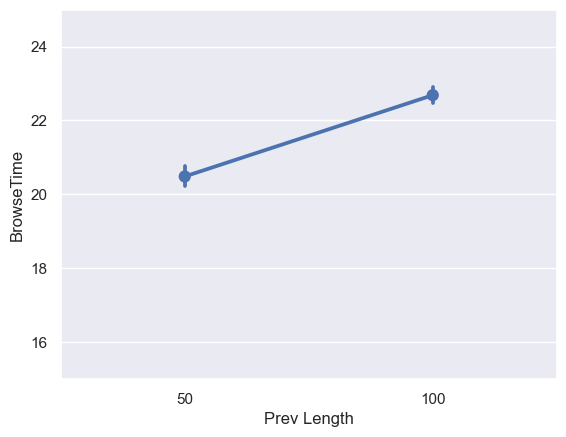

In [ ]:
import seaborn as sns

sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="PrevLength", y="BrowseTime", data=original)
fig1.set_ylabel("BrowseTime")
fig1.set_xlabel("Prev Length")
fig1.set_ylim(15, 25)
# Low level is better = 50

(15.0, 25.0)

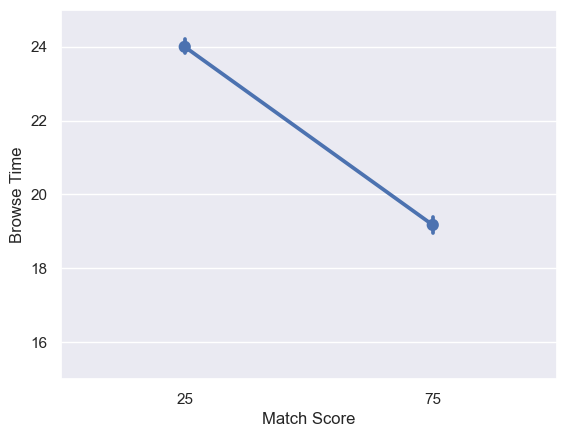

In [ ]:
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="MatchScore", y="BrowseTime", data=original)
fig1.set_ylabel("Browse Time")
fig1.set_xlabel("Match Score")
fig1.set_ylim(15, 25)
# better in high level 

(15.0, 25.0)

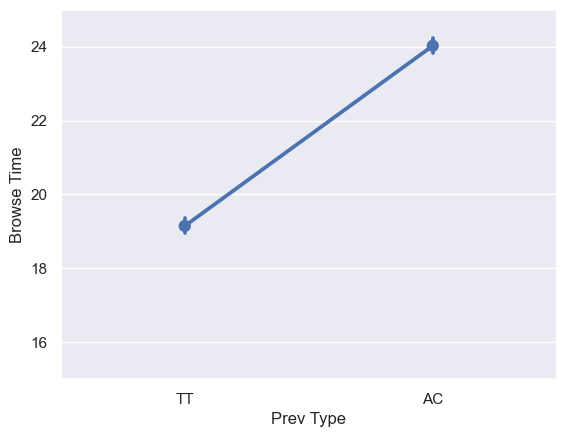

In [ ]:
sns.set_theme(style="darkgrid")
fig1 = sns.pointplot(x="PrevType", y="BrowseTime", data=original)
fig1.set_ylabel("Browse Time")
fig1.set_xlabel("Prev Type")
fig1.set_ylim(15, 25)
#lower level better

(15.0, 25.0)

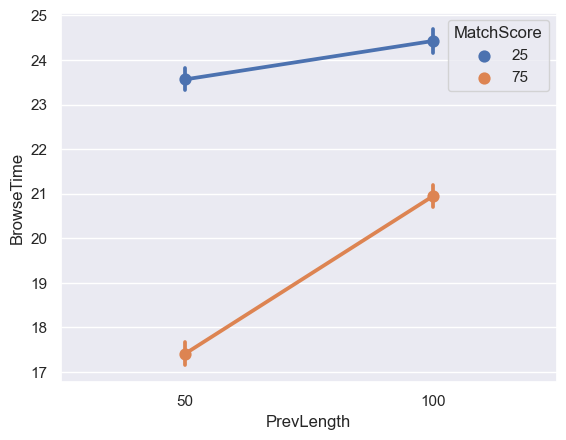

In [ ]:
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="PrevLength", hue="MatchScore", y="BrowseTime", data=original)
fig1.set_ylabel("BrowseTime")
fig1.set_xlabel("Prev Type")
fig1.set_ylim(15, 25)

#low level of PrevLength with high level of match score

Could look at interaction/ME plots here for more info
low level of PrevLength with high level of match score

In [ ]:
from itertools import product

# Define your variables and their respective possible values
variable_values = {
    'Tile.Size': [0.2],
    'Match.Score': [60,90], #original high level was 75
    'Prev.Length': [40,60], #50 was the original low level
    'Prev.Type': ['TT']
}

# Generate all possible combinations
combinations = list(product(*variable_values.values()))

# Create a DataFrame
df = pd.DataFrame(combinations, columns=variable_values.keys())
df.to_csv('csv/NSTEVENS.csv', index=False)

In [ ]:
data2 = pd.read_csv('results/RESULTS_NSTEVENS_round2.csv')
data2.rename(columns={'Match.Score': 'PrevLength', 'Match.Score': 'MatchScore', 'Tile.Size':'TileSize', 'Prev.Type': 'PrevType', 'Browse.Time': 'BrowseTime'}, inplace=True)
data2.head(10)

,TileSize,MatchScore,PrevLength,PrevType,BrowseTime
0,0.2,60,40,TT,18.848619
1,0.2,60,60,TT,18.040236
2,0.2,90,40,TT,15.500076
3,0.2,90,60,TT,15.323155
4,0.2,60,40,TT,17.978835
5,0.2,60,60,TT,15.998081
6,0.2,90,40,TT,16.300345
7,0.2,90,60,TT,14.828574
8,0.2,60,40,TT,19.219700
9,0.2,60,60,TT,16.285065


(15.0, 25.0)

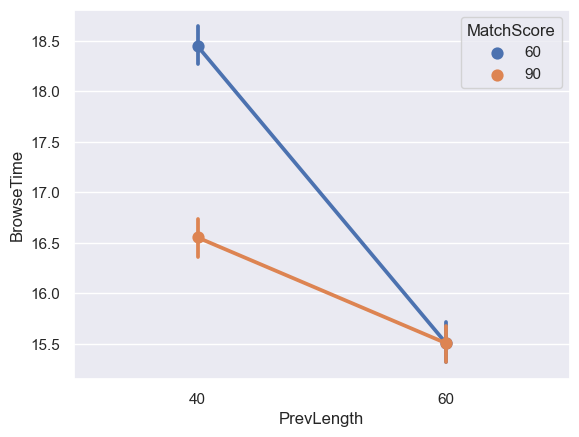

In [ ]:
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="PrevLength", hue="MatchScore", y="BrowseTime", data=data2)
fig1.set_ylabel("BrowseTime")
fig1.set_xlabel("Prev Type")
fig1.set_ylim(15, 25)

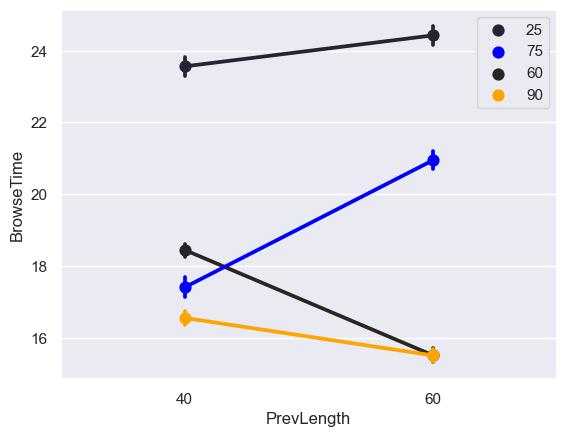

In [ ]:
fig, ax = plt.subplots()

# Plot the first seaborn.pointplot on the specified axis
sns.pointplot(x="PrevLength", hue="MatchScore", y="BrowseTime", data=original, ax=ax, color='blue', label='Data 1')

# Plot the second seaborn.pointplot on the same axis
sns.pointplot(x="PrevLength", hue="MatchScore", y="BrowseTime", data=data2, ax=ax, color='orange', label='Data 2')

# Add legend
ax.legend()

# Show the plot
plt.show()

In [ ]:
#At PrevLength 60 seconds, the match score doesn't matter

In [ ]:
valid_original=original[original['PrevType']=='TT'].copy()

(15.0, 25.0)

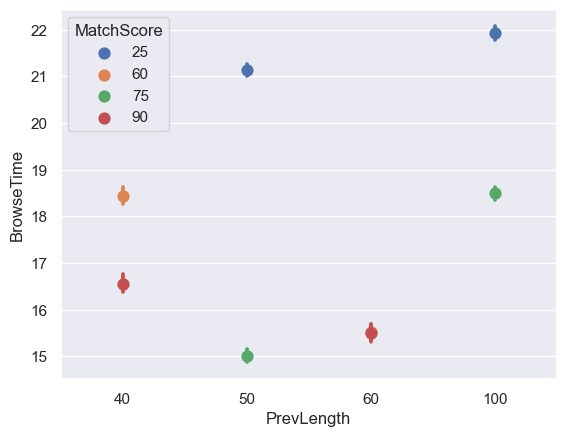

In [ ]:
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="PrevLength", hue="MatchScore", y="BrowseTime", data=pd.concat([valid_original,data2],axis=0))
fig1.set_ylabel("BrowseTime")
fig1.set_xlabel("Prev Type")
fig1.set_ylim(15, 25)

NSTEVENS optimal
- Match.Score = 65
- Match.Score = 70
- Prev.Type = 'TT'
- Tile.Size … not relevant

2k = round 0: 16 + round 1: 4 + round 2: 9 + ? 
CCD = 9
(37 experiments)
- Prev.Length = 55 - 65
- Match.Score = 70

In [ ]:
from itertools import product

# Define your variables and their respective possible values
variable_values = {
    'Tile.Size': [0.2],
    'Match.Score': [55,65,85,95], #original high level was 75
    'Prev.Length': [55,65], #50 was the original low level
    'Prev.Type': ['TT']
}

# Generate all possible combinations
combinations = list(product(*variable_values.values()))

# Create a DataFrame
df = pd.DataFrame(combinations, columns=variable_values.keys())
df.to_csv('csv/NSTEVENS.csv', index=False)

In [ ]:
data3 = pd.read_csv('results/RESULTS_NSTEVENS_round3.csv')
data3.rename(columns={'Prev.Length': 'PrevLength', 'Match.Score': 'MatchScore', 'Tile.Size':'TileSize', 'Prev.Type': 'PrevType', 'Browse.Time': 'BrowseTime'}, inplace=True)
data3.head(10)

,TileSize,MatchScore,PrevLength,PrevType,BrowseTime
0,0.2,55,55,TT,15.988647
1,0.2,55,65,TT,14.686823
2,0.2,65,55,TT,15.687679
3,0.2,65,65,TT,17.281811
4,0.2,85,55,TT,13.754627
5,0.2,85,65,TT,15.111319
6,0.2,95,55,TT,15.109803
7,0.2,95,65,TT,17.264123
8,0.2,55,55,TT,16.064883
9,0.2,55,65,TT,15.452273


(15.0, 25.0)

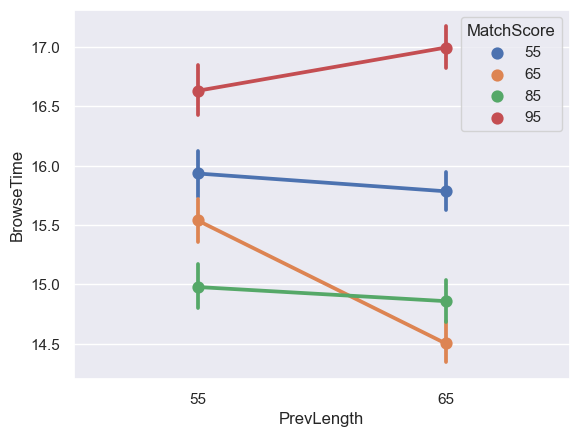

In [ ]:
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="PrevLength", hue="MatchScore", y="BrowseTime", data=data3)
fig1.set_ylabel("BrowseTime")
fig1.set_xlabel("Prev Type")
fig1.set_ylim(15, 25)

(15.0, 25.0)

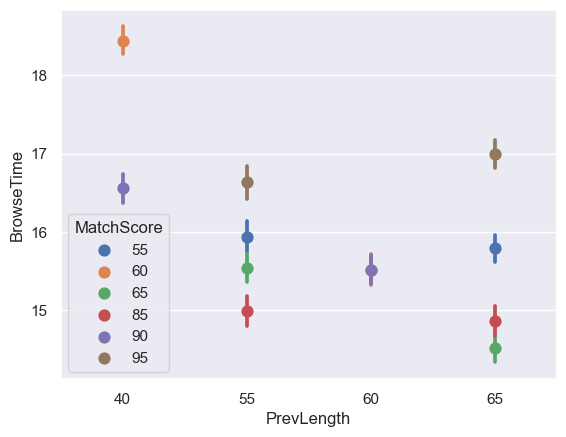

In [ ]:
sns.set_theme(style="darkgrid")
fig12 = sns.pointplot(x="PrevLength", hue="MatchScore", y="BrowseTime", data=pd.concat([data2,data3],axis=0))
fig1.set_ylabel("BrowseTime")
fig1.set_xlabel("Prev Type")
fig1.set_ylim(15, 25)

# CCD

In [41]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U

In [42]:
#using a = 1.4 for axial points to get U values to put into NSTEVENS.csv

UMSPos = convertCtoN(1.4, 75, 65)
UMSNeg = convertCtoN(-1.4, 75, 65)

UPLPos = convertCtoN(1.4, 70, 60 )
UPLNeg = convertCtoN(-1.4, 70, 60 )

print(UMSPos, UPLPos)  # round to 77 and 72
print(UMSNeg, UPLNeg)

77.0 72.0
63.0 58.0


PLugged these numbers into nstevens.csv for generating data

In [43]:
ccd = pd.read_csv('RESULTS_NSTEVENS_CCD.csv')
ccd.head(10)

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time
0,60,65,0.2,TT,16.497181
1,70,65,0.2,TT,15.122040
2,60,75,0.2,TT,14.980868
3,70,75,0.2,TT,15.588625
4,72,70,0.2,TT,14.060485
5,58,70,0.2,TT,14.340245
6,65,77,0.2,TT,14.943146
7,65,63,0.2,TT,15.753416
8,65,70,0.2,TT,15.091243
9,60,65,0.2,TT,15.527832


In [44]:
ccd['PrevLength'] = 0 

ccd.loc[ccd['Prev.Length'] == 60, 'PrevLength'] = -1
ccd.loc[ccd['Prev.Length'] == 70, 'PrevLength'] = 1
ccd.loc[ccd['Prev.Length'] == 72, 'PrevLength'] = 1.4
ccd.loc[ccd['Prev.Length'] == 58, 'PrevLength'] = -1.4
ccd.loc[ccd['Prev.Length'] == 65, 'PrevLength'] = 0

In [45]:
ccd['MatchScore'] = 0 

ccd.loc[ccd['Match.Score'] == 65, 'MatchScore'] = -1
ccd.loc[ccd['Match.Score'] == 75, 'MatchScore'] = 1
ccd.loc[ccd['Match.Score'] == 77, 'MatchScore'] = 1.4
ccd.loc[ccd['Match.Score'] == 63, 'MatchScore'] = -1.4
ccd.loc[ccd['Match.Score'] == 70, 'MatchScore'] = 0

ccd

,Prev.Length,Match.Score,Tile.Size,Prev.Type,Browse.Time,PrevLength,MatchScore
0,60,65,0.2,TT,16.497181,-1.0,-1.0
1,70,65,0.2,TT,15.122040,1.0,-1.0
2,60,75,0.2,TT,14.980868,-1.0,1.0
3,70,75,0.2,TT,15.588625,1.0,1.0
4,72,70,0.2,TT,14.060485,1.4,0.0
...,...,...,...,...,...,...,...
895,72,70,0.2,TT,16.940977,1.4,0.0
896,58,70,0.2,TT,14.239270,-1.4,0.0
897,65,77,0.2,TT,14.100585,0.0,1.4
898,65,63,0.2,TT,16.266279,0.0,-1.4


In [46]:
ccd.rename(columns={'Browse.Time': 'BrowseTime'}, inplace=True)


Full 2nd order model: $$\beta_0+\beta_1PrevLength+\beta_2+MatchScore+\beta_{12}PrevLength*MatchScore+\beta_{11}PrevLength^2+\beta_{22}MatchScore^2$$

In [47]:
ccdmodel = smf.ols('BrowseTime ~ PrevLength + MatchScore + PrevLength:MatchScore + I(PrevLength**2) + I(MatchScore**2)', data = ccd).fit()
ccdmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BrowseTime   R-squared:                       0.108
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     21.71
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.49e-20
Time:                        17:04:16   Log-Likelihood:                -1265.2
No. Observations:                 900   AIC:                             2542.
Df Residuals:                     894   BIC:                             2571.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                14.0505      0.099    141.954      0.000      13.856      14.245
PrevLength               -0.0942      0.035     -2.677      0.008      -0.163      -0.025
MatchScore               -0.2498      0.035     -7.098      0.000      -0.319      -0.181
PrevLength:MatchScore    -0.0632      0.050     -1.277      0.202      -0.160       0.034
I(PrevLength ** 2)        0.4125      0.059      7.024      0.000       0.297       0.528
I(MatchScore ** 2)        0.2640      0.059      4.496      0.000       0.149       0.379
==============================================================================
Omnibus:                        0.164   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.921   Jarque-Bera (JB):                0.248
Skew:                           0.005   Prob(JB):                        0.883
Kurtosis:                       2.919   Cond. No.                         6.07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

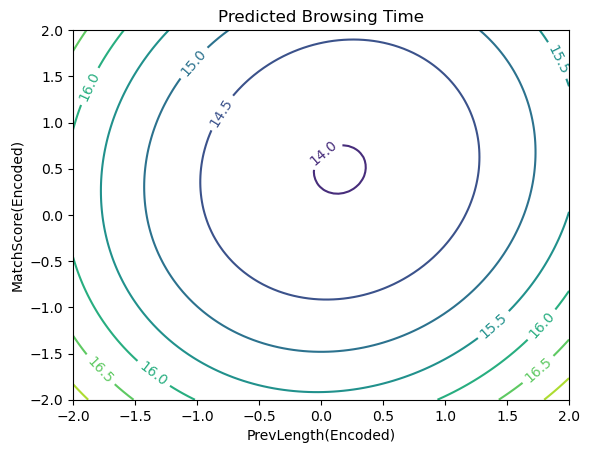

In [48]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 55, UH = 70, UL = 60), 
                                 convertNtoC(U = 75, UH = 70, UL = 60), 100), 
                     np.linspace(convertNtoC(U = 60, UH = 75, UL = 65), 
                                 convertNtoC(U = 80, UH = 75, UL = 65), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
# pi = np.exp(eta)/(1+np.exp(eta))
y = eta

h = plt.contour(x1, x2, y)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('PrevLength(Encoded)')
plt.ylabel('MatchScore(Encoded)')
plt.title('Predicted Browsing Time')
plt.show()

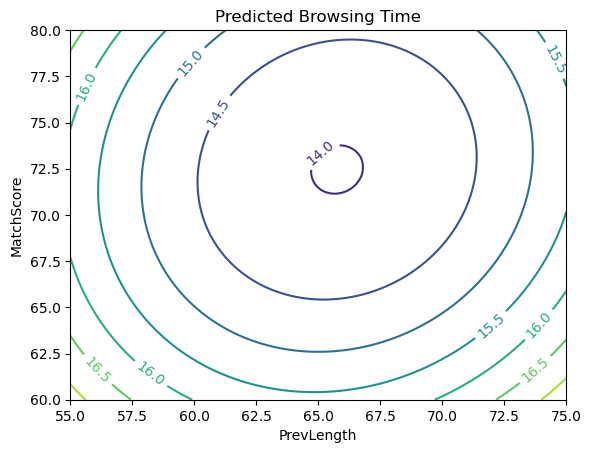

In [49]:
h = plt.contour(convertCtoN(x1, UH=70, UL=60),
                convertCtoN(x2, UH=75, UL=65), y)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('PrevLength')
plt.ylabel('MatchScore')
plt.title('Predicted Browsing Time')
plt.show()

In [50]:
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Browse time is minimized when x1=", x_s[0], "and x2=", x_s[1])

Browse time is minimized when x1= [[0.15181619]] and x2= [[0.49116065]]


Natural units

In [51]:
xsN_1 = convertCtoN(x = x_s[0], UH = 70, UL = 60)
xsN_2 = convertCtoN(x = x_s[1], UH = 75, UL = 65)
print("PrevLength=", xsN_1, ", MatchScore=", xsN_2)

PrevLength= [[65.75908097]] , MatchScore= [[72.45580325]]


In [52]:
#predicted minimum browsing time:

eta_s = beta0 + 0.5*np.matmul(x_s.transpose(), b)
print(eta_s)

[[13.9819828]]


In [54]:
#65 AND 72 come from rounding the predictions above

yhat = ccdmodel.predict(exog=dict(PrevLength=convertNtoC(U = 65, UH = 70, UL = 60), 
                               MatchScore=convertNtoC(U = 72, UH = 75, UL = 65)))
print(yhat)

0    13.99281
dtype: float64
